Text(0.5, 0, 'petal length')

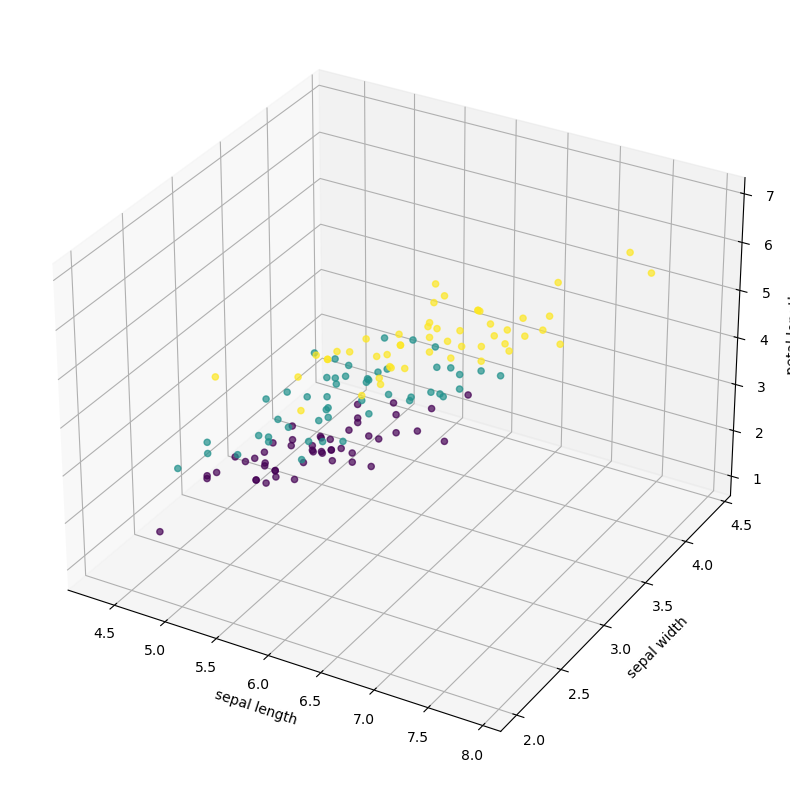

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, alpha=0.7)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
preds = tree.predict_proba(X_test)
accuracy_score(y_test, preds.argmax(axis=1))

0.9111111111111111

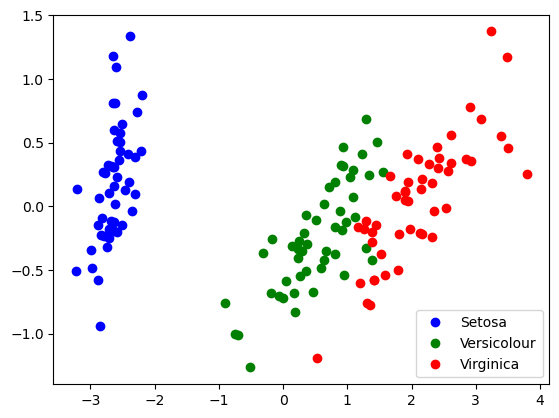

In [19]:
pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, stratify=y)
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
preds = tree.predict_proba(X_test)
accuracy_score(y_test, preds.argmax(axis=1))

0.9777777777777777

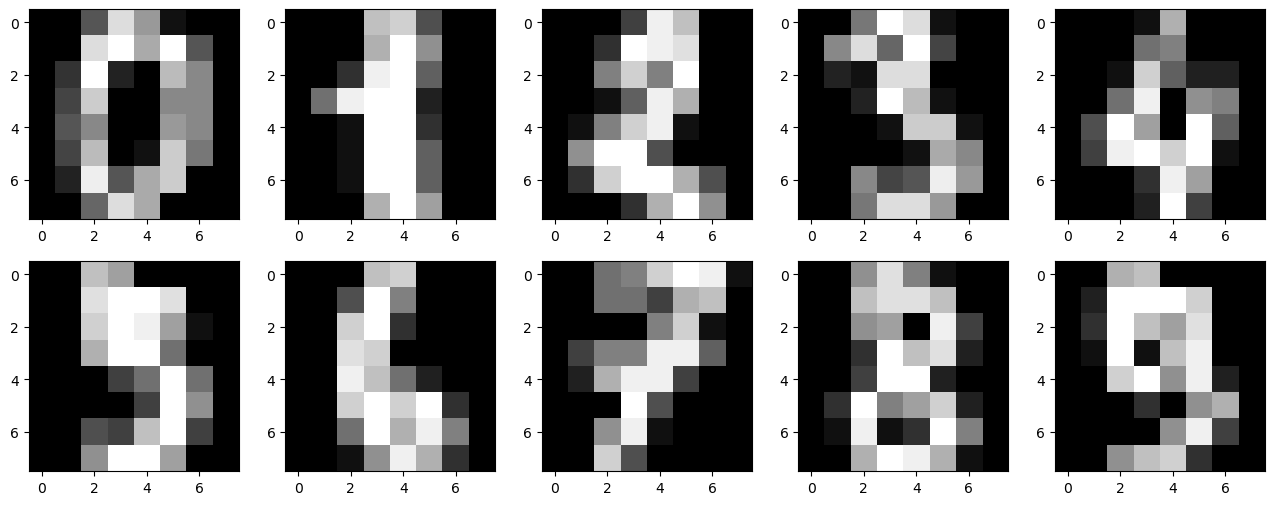

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
X,y = digits.data, digits.target

plt.figure(figsize=(16,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i, :].reshape([8,8]), cmap='gray')

Text(0.5, 1.0, 'mnist pca')

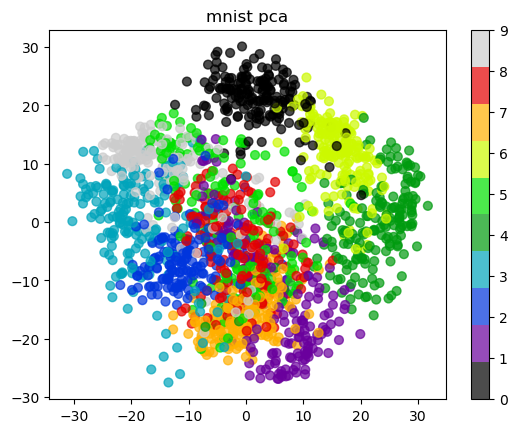

In [35]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7, s=40, cmap=plt.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('mnist pca')

Text(0.5, 1.0, 'mnist tsne')

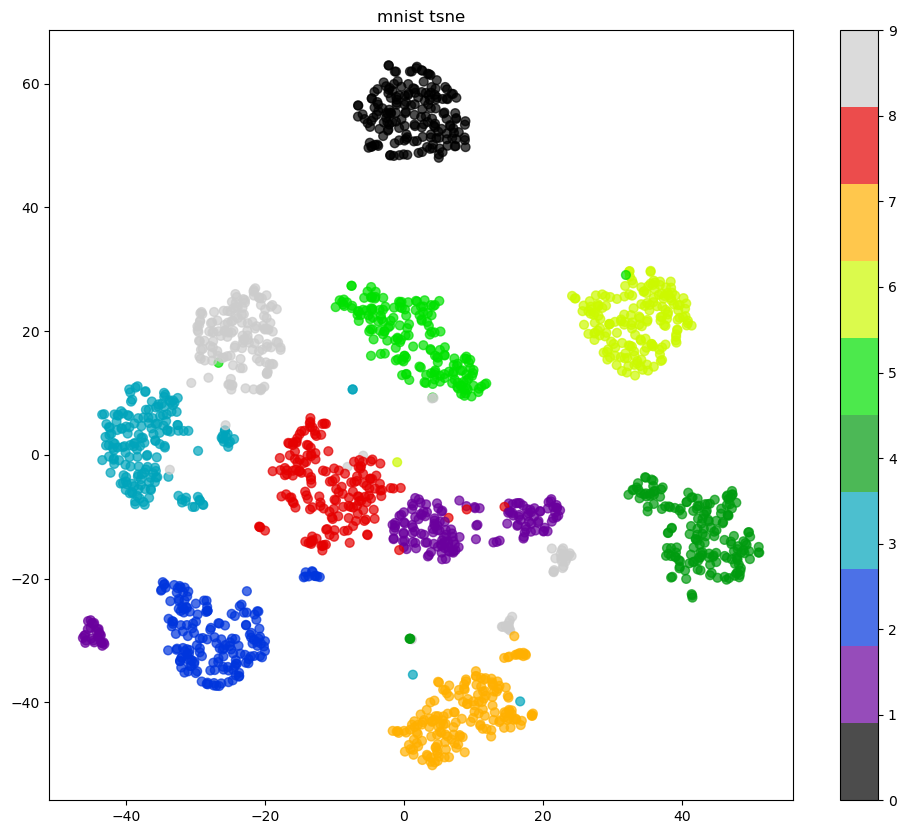

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.7, s=40, cmap=plt.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('mnist tsne')

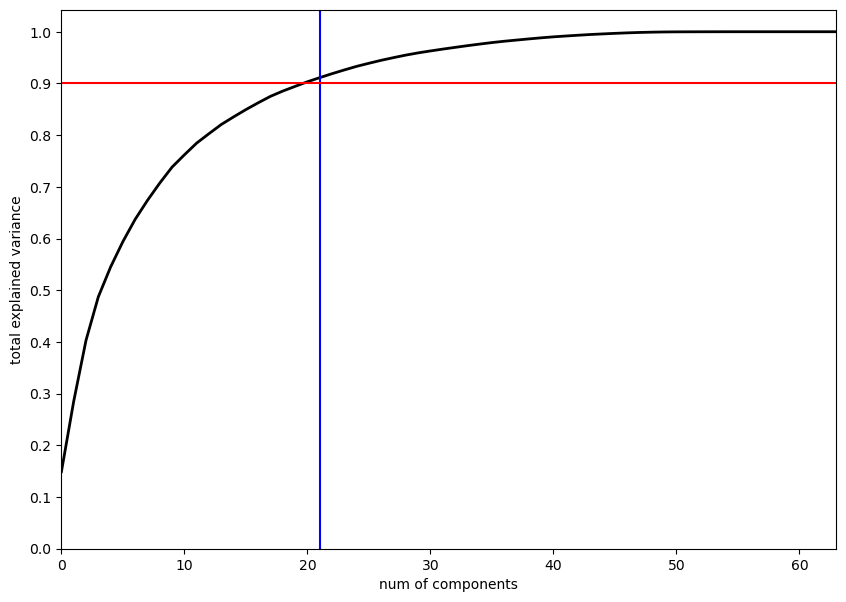

In [41]:
pca = PCA().fit(X)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k", lw=2)
plt.xlabel("num of components")
plt.ylabel("total explained variance")
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c="b")
plt.axhline(0.9, c="r")
plt.show();

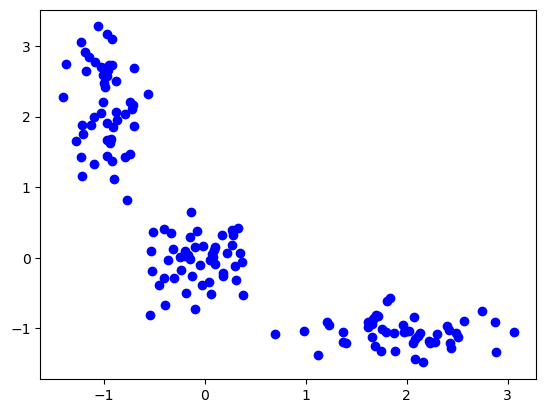

In [52]:
# k-means

X = np.zeros((150,2))

X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

plt.plot(X[:, 0], X[:, 1], 'bo')

In [53]:
from scipy.spatial.distance import cdist

centroids = np.random.normal(loc=0.0, scale=1.0, size=6)
centroids = centroids.reshape((3,2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    d = cdist(X, centroids)
    labels = d.argmin(axis=1)
    
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

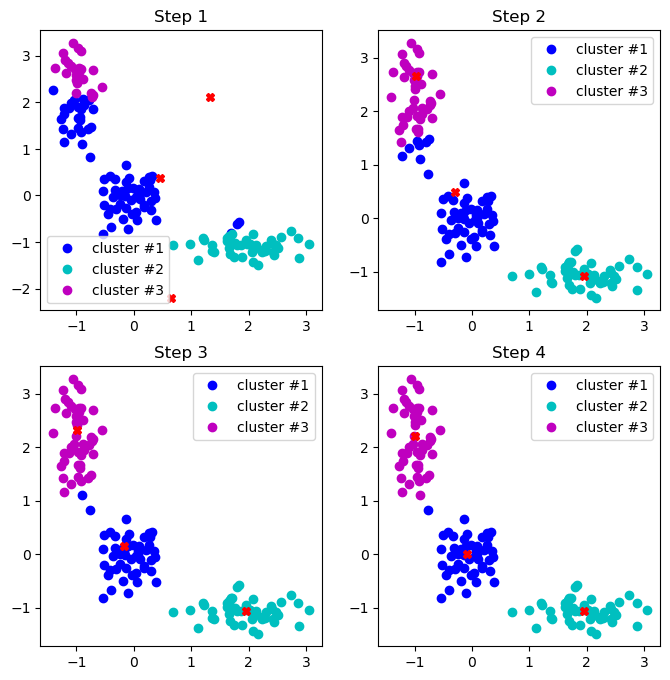

In [55]:
plt.figure(figsize=(8, 8))
for i in range(4):
    d = cdist(X, cent_history[i])
    labels = d.argmin(axis=1)
    
    plt.subplot(2,2,i+1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "co", label="cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "mo", label="cluster #3")
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], "rX")
    plt.legend()
    plt.title("Step {:}".format(i + 1));

In [57]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\serge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\serge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\serge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\serge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, '$J(C_k)$')

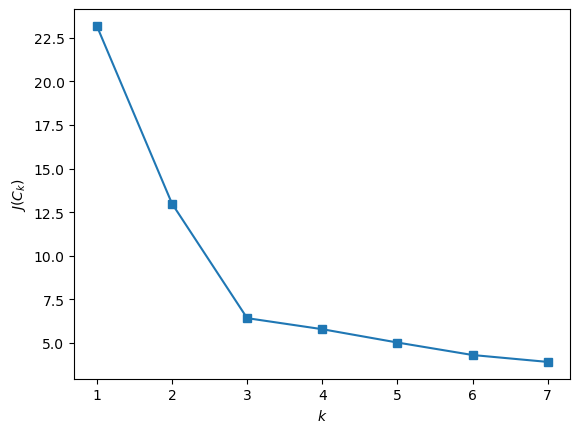

In [59]:
plt.plot(range(1,8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

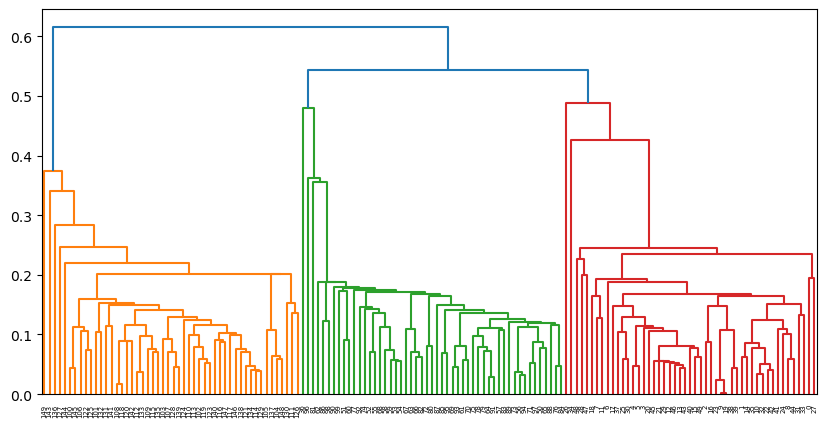

In [61]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn import metrics, cluster

digits = load_digits()
X, y = digits.data, digits.target

algr = []
algr.append(cluster.KMeans(n_init='auto'))
algr.append(cluster.AffinityPropagation())
algr.append(cluster.SpectralClustering())
algr.append(cluster.AgglomerativeClustering())

data = []
for alg in algr:
    alg.fit(X)
    data.append({
        "ARI": metrics.adjusted_rand_score(y, alg.labels_),
        "AMI": metrics.adjusted_mutual_info_score(y, alg.labels_),
        "Homogenity": metrics.homogeneity_score(y, alg.labels_),
        "Completeness": metrics.completeness_score(y, alg.labels_),
        "V-measure": metrics.v_measure_score(y, alg.labels_),
        "Silhouette": metrics.silhouette_score(X, alg.labels_),
    })
    
pd.DataFrame(
    data, 
    columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure', 'Silhoette'],
    index=['K-means', 'Affinity', 'Spectral', 'Agglomerative']
)

In [106]:
from tqdm import notebook
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [72]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
X_train = np.loadtxt('./data/UCI HAR Dataset/train/X_train.txt')
y_train = np.loadtxt('./data/UCI HAR Dataset/train/y_train.txt')

X_test = np.loadtxt('./data/UCI HAR Dataset/test/X_test.txt')
y_test = np.loadtxt('./data/UCI HAR Dataset/test/y_test.txt')

In [79]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
np.unique(y)

array([1., 2., 3., 4., 5., 6.])

In [80]:
n_classes = np.unique(y).size

In [82]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=0.9).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [83]:
X_pca.shape

(10299, 65)

In [84]:
round(pca.explained_variance_ratio_[0] * 100)

51

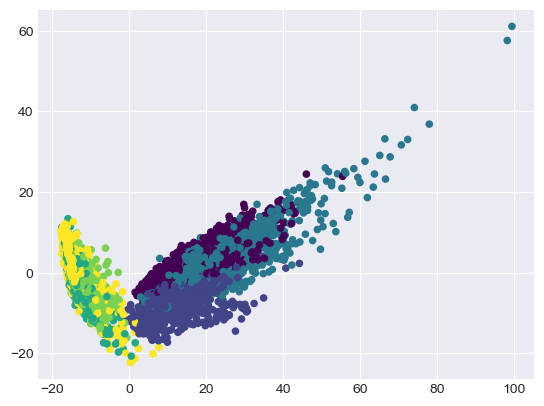

In [87]:
plt.style.use("seaborn-v0_8-darkgrid")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis')

In [88]:
kmeans = KMeans(n_clusters=n_classes, n_init=100)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, ..., 3, 3, 3])

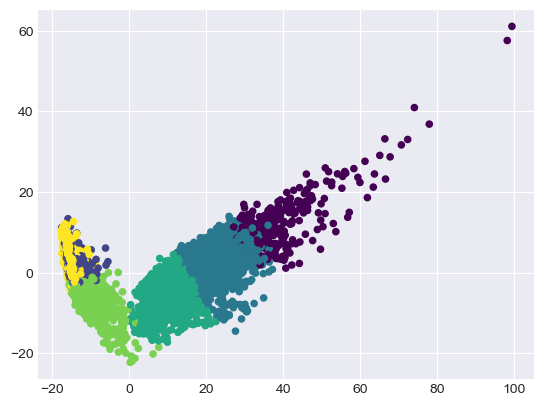

In [89]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20, cmap='viridis')

In [90]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = [
    'walking',
    'going up the stairs',
    'goind down the stairs',
    'sitting',
    'standing',
    'laying',
    'all'
]
tab.columns = ['cluster' + str(i+1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,78,0,742,902,0,0,1722
going up the stairs,5,0,296,1241,2,0,1544
goind down the stairs,196,0,890,320,0,0,1406
sitting,0,1234,0,1,454,88,1777
standing,0,1335,0,0,571,0,1906
laying,0,52,0,5,331,1556,1944
all,279,2621,1928,2469,1358,1644,10299


In [103]:
pd.Series(
    tab.iloc[:-1, :-1].max(axis=1).values / tab.iloc[:-1, -1].values,
    index=tab.index[:-1],
)

walking                  0.523810
going up the stairs      0.803756
goind down the stairs    0.633001
sitting                  0.694429
standing                 0.700420
laying                   0.800412
dtype: float64

In [108]:
inertia = []
for i in notebook.tqdm(range(1, n_classes+1)):
    kmeans = KMeans(n_clusters=i, n_init=100).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

  0%|          | 0/6 [00:00<?, ?it/s]

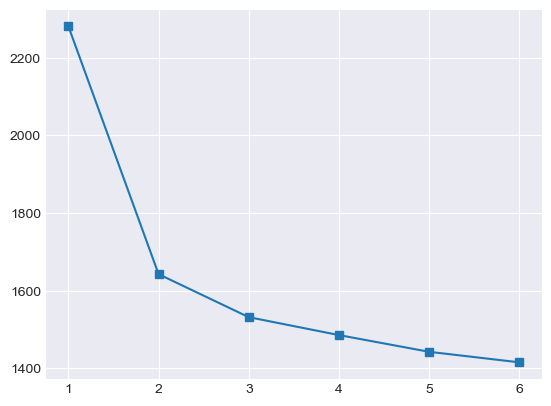

In [109]:
plt.plot(range(1,7), inertia, marker='s')

In [111]:
d = {}
for k in range(2,6):
    i = k-1
    d[k] = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
d

{2: 0.17344753560094212,
 3: 0.41688555755863926,
 4: 0.9332206481708135,
 5: 0.6297001064647522}

In [113]:
agc = cluster.AgglomerativeClustering(n_clusters=n_classes).fit(X_pca)
print('KMeans ARI', metrics.adjusted_rand_score(y, cluster_labels))
print('Agg Clustering ARI', metrics.adjusted_rand_score(y, agc.labels_))

KMeans ARI 0.41921706478509063
Agg Clustering ARI 0.49362763373004886


In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = LinearSVC(dual='auto')
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

best_svc = GridSearchCV(svc, svc_params, n_jobs=-1, cv=3, verbose=1)
best_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=LinearSVC(dual='auto'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=1)

In [116]:
best_svc.best_params_, best_svc.best_score_

({'C': 0.1}, 0.9382506099134881)

In [118]:
pred = best_svc.predict(X_test_scaled)
tab = pd.crosstab(y_test, pred, margins=True)
tab.index = [
    "walking",
    "climbing up the stairs",
    "going down the stairs",
    "sitting",
    "standing",
    "laying",
    "all",
]
tab.columns = [
    "walking",
    "climbing up the stairs",
    "going down the stairs",
    "sitting",
    "standing",
    "laying",
    "all",
]
tab

,walking,climbing up the stairs,going down the stairs,sitting,standing,laying,all
walking,494,2,0,0,0,0,496
climbing up the stairs,12,459,0,0,0,0,471
going down the stairs,2,4,413,1,0,0,420
sitting,0,4,0,426,61,0,491
standing,0,0,0,15,517,0,532
laying,0,0,0,0,11,526,537
all,508,469,413,442,589,526,2947


In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svc = LinearSVC()
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

best_svc_pca = GridSearchCV(svc, svc_params, n_jobs=-1, cv=3, verbose=1)
best_svc_pca.fit(X_train_pca, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\serge\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=1)

In [120]:
best_svc_pca.best_params_, best_svc_pca.best_score_

({'C': 0.1}, 0.8983983213848573)

In [124]:
round(100 * (best_svc_pca.best_score_ - best_svc.best_score_), 2)

-3.96